In [2]:
import neo4j
import osmnx as ox

In [3]:
#Creates a driver to connect to neo4j database with credentials that are read from codespace secrets.
NEO4J_PASSWORD = "J065QWWYW4Y3Mjc-Vozijb1V6A5kkwxC_a-zYskPCho"
NEO4J_URI = "neo4j+s://4a8a0d17.databases.neo4j.io"
NEO4J_USER = "neo4j"
 
driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

OpenStreetMap Road Network With OSMNx

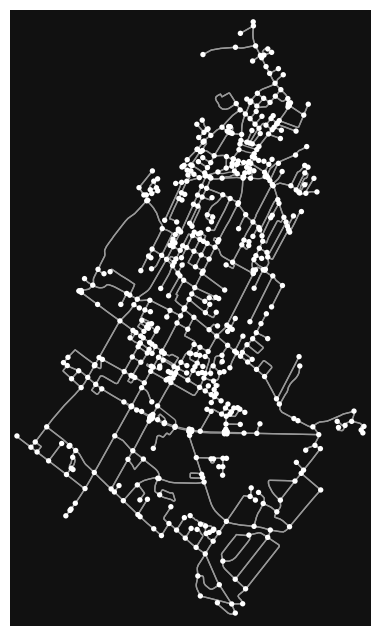

In [4]:
#Searches OpenStreetMaps for Taos, NM and creates a OSMNx graph
#OSMnx is a Python package that models, analyzes, and visualizes street networks and other geospatial features from OpenStreetMap.
G = ox.graph_from_place("Taos, NM, USA", network_type="drive")

#figure and axis variables which are matplotlib classes used for displaying and customizing maps.
figure, axis = ox.plot_graph(G)

In [5]:
#Convert and represent the road network into two GeoDataFrames (Like pandas dataframe but for geospatial data)

#graph_to_gdfs function returns the nodes of the of graph and relationships (edges) between the nodes.
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
#Resets indexes to start at 0 and inplace only modifies the nodes directly.
gdf_nodes.reset_index(inplace=True)
#Resets indexes to start at 0 and inplace only modifies the relationships directly.
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,street_count,highway,geometry
0,144191660,36.407924,-105.576479,3,NaN,POINT (-105.57648 36.40792)
1,144191763,36.394733,-105.583294,3,NaN,POINT (-105.58329 36.39473)
2,144191774,36.396491,-105.582799,1,NaN,POINT (-105.5828 36.39649)
3,144191776,36.397637,-105.582072,4,NaN,POINT (-105.58207 36.39764)
4,144191779,36.398986,-105.581253,4,NaN,POINT (-105.58125 36.39899)
...,...,...,...,...,...,...
618,10227067066,36.365079,-105.585609,3,NaN,POINT (-105.58561 36.36508)
619,11054311568,36.378458,-105.586865,3,NaN,POINT (-105.58686 36.37846)
620,11079033015,36.378306,-105.567009,3,NaN,POINT (-105.56701 36.37831)
621,11219688777,36.399174,-105.580431,1,NaN,POINT (-105.58043 36.39917)


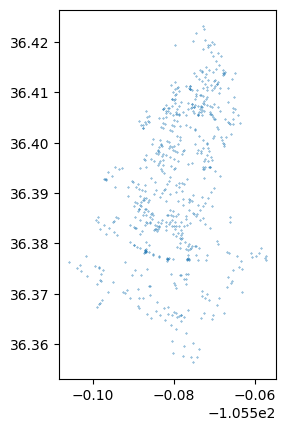

In [6]:
#markersize sets the size of the nodes in the output.
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,name,highway,oneway,reversed,length,geometry,lanes,ref,maxspeed,junction
0,144191660,144336484,0,14632878,Don Fernando Street,residential,False,False,157.031,"LINESTRING (-105.57648 36.40792, -105.57683 36...",NaN,NaN,NaN,NaN
1,144191660,3022490157,0,14632878,Don Fernando Street,residential,False,True,91.421,"LINESTRING (-105.57648 36.40792, -105.57613 36...",NaN,NaN,NaN,NaN
2,144191660,144355500,0,14633954,Padre Martinez Lane,residential,False,True,144.713,"LINESTRING (-105.57648 36.40792, -105.5765 36....",NaN,NaN,NaN,NaN
3,144191763,3455899138,0,14624209,Zia Street,residential,False,False,115.383,"LINESTRING (-105.58329 36.39473, -105.58271 36...",NaN,NaN,NaN,NaN
4,144191763,144338397,0,14635021,La Posta Road,tertiary,False,True,41.418,"LINESTRING (-105.58329 36.39473, -105.58301 36...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,11054311568,3455898031,0,338509768,Paseo del Canon,primary,True,False,3.413,"LINESTRING (-105.58686 36.37846, -105.58687 36...",2,NM 585,NaN,roundabout
1503,11079033015,144364669,0,14634519,Cruz Alta Road,secondary,False,True,57.107,"LINESTRING (-105.56701 36.37831, -105.56645 36...",NaN,NaN,NaN,NaN
1504,11079033015,144364675,0,14634519,Cruz Alta Road,secondary,False,False,281.997,"LINESTRING (-105.56701 36.37831, -105.56869 36...",NaN,NaN,NaN,NaN
1505,11219688777,144350649,0,1193580796,Apache Street,residential,False,True,98.120,"LINESTRING (-105.58043 36.39917, -105.58 36.39...",NaN,NaN,NaN,NaN


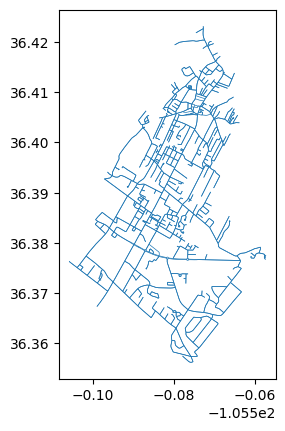

In [7]:
#linewidth sets the width of the lines in the output.
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

In [8]:
#Define queries to create indexes and property uniqueness constraints for no duplicates. Important when using MERGE.

#Constraint that requires the osmid to be unique in the nodes dataframe before creating the node.
constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

#Constraint that requires the osmid to be unique in the relationship dataframe before creating the node.
rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmid"

#Constraint that requires the street name AND the address number to be unique before creating an address node.
address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE (a.street, a.number) IS UNIQUE" #Composite Uniqueness Constraint

#Creates a point index which is used to store coordinates in the location parameter of each Intersection node.
point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

#Cypher query to import road network nodes GeoDataFrame

node_query = '''
//UNWIND is used for batching the import data and calling the query on specified batch sizes.
    UNWIND $rows AS row
//Creates Intersection nodes with osmid and sets parameters based on geodataframe data.
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location =
         point({latitude: row.y, longitude: row.x}),
                i.ref = row.ref,
                i.highway = row.highway,
                i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

#Cypher queries to load road network relationships GeoDataFrame

rels_query = '''
//UNWIND is used for batching the import data and calling the query on specified batch sizes.
    UNWIND $rows AS road
//Matches nodes based on osmid in order to create a relationship between nodes u and v
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
//Creates a relationship between the matched nodes symbolizing a road.
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
//Sets the parameters newly created edge node based on the geodataframe data.
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
//Returns total number of nodes to check for import success.
    RETURN COUNT(*) AS total'''

In [9]:
#function to run all queries.
def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)

In [10]:
#Sets batchsize to 10,000 rows from the GeoDataFrame for each function run. 
def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0

    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1 

In [11]:
with driver.session() as session:
#executes queries on current neo4j session
    session.execute_write(create_constraints)
#Drops the geometry column as it has repeated coordinates
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry']))

[{'total': 623}]


In [12]:
with driver.session() as session:
#executes queries on current neo4j session and the geometry column is removed.
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry']))

[{'total': 1507}]


Format of each feature:
***
    {
        "type": "Feature",
        "properties": {
            "hash": "3653fc4737fc598a",
            "number": "2908",
            "street": "TENNESSEE ST NE",
            "unit": "",
            "city": "",
            "district": "",
            "region": "",
            "postcode": "",
            "id": ""
        },
        "geometry": {
            "type": "Point",
            "coordinates": [
                -106.5573501,
                35.1151189
            ]
        }
    }
***

In [13]:
#Import JSON file of address data

#GZ files needed to be converted and formatted into geojson data and stored in a Amazon S3 bucket for online access in order for the apoc library to function correctly.

add_addresses_query = """
//Used the apoc library to interate over json data as each feature (value) is a address.
CALL apoc.periodic.iterate(
    'CALL apoc.load.json("https://taosaddresses.s3.us-east-2.amazonaws.com/formatted_geojson.json") YIELD value',
//Creates Address nodes as long as the street name and street number is unique as there are duplicates in the geojson data. Tried using the hash the unique constraint but duplicates had unique hashes.
    'MERGE (a:Address {street: value.properties.street, number: value.properties.number})
//The parameters of each Address node are set based on the features of the json data
SET a.location = 
//Point accesses the geometry of the json feature.
    point(
        {latitude: value.geometry.coordinates[1], longitude: value.geometry.coordinates[0]}),
//Gives each address node a full address by concatinating every parameter needed for an address.
     a.full_address = value.properties.number + " " + value.properties.street + " " + value.properties.city + ", NM " + value.properties.postcode

//Updates nodes with new properties with full_property being the property.
SET a += value.properties',
//batchSize is the number of nodes being processed and parallel allows multiple batches to be processed simultaneously.
  {batchSize:10000, parallel:true})
"""

#Connect each address to the road network at the nearest intersection

near_intersection_query = """
CALL apoc.periodic.iterate(
//Each Address node will be connected to one Intersection node that is nearest. 
    'MATCH (p:Address) WHERE NOT EXISTS ((p)-[:NEAREST_INTERSECTION]->(:Intersection)) RETURN p',
    'CALL {
    WITH p
    MATCH (i:Intersection)
    USING INDEX i:Intersection(location)
//Matches Intersection nodes where the point index is less than 200 units away from the current address node.
    WHERE point.distance(i.location, p.location) < 200

//Orders the matched intersection nodes (i) by distance and limits i to one node which will be the shortest distance to the current address node.
    WITH i
    ORDER BY point.distance(p.location, i.location) ASC
    LIMIT 1
    RETURN i
}
//p is current address and i is the found nearest intersection.
WITH p, i
//Create relationship between current address and nearest intersection
MERGE (p)-[r:NEAREST_INTERSECTION]->(i)
//Sets a length property by using the index distance function between the address and nearest intersection.
SET r.length = point.distance(p.location, i.location)
RETURN COUNT(p)',
    {batchSize:1000, parallel:false})
"""

#Create a full text index to enable search for address nodes based on the full_address and name in the front end if needed.

full_text_query = "CREATE FULLTEXT INDEX search_index IF NOT EXISTS FOR (p:PointOfInterest|Address) ON EACH [p.name, p.full_address]"

In [14]:
#Function to run address import query and address relationship query.
def enrich_addresses(tx):
    results = tx.run(add_addresses_query)
    results = tx.run(near_intersection_query)

In [15]:
#Runs query function in the neo4j driver session.
with driver.session() as session:
    session.execute_write(enrich_addresses)

In [16]:
#Creates the full text query.
with driver.session() as session:
    results = session.execute_write(lambda tx: tx.run(full_text_query))